# [실습] 선 그래프와 막대 그래프

이번 실습은 서울대공원의 입장객 데이터를 막대그래프와 선 그래프로 시각화하는 방법을 알아보겠습니다.

두 그래프는 데이터의 값을 비교할 때 유용한 그래프들입니다.

## 1. 데이터 불러오기

먼저 실습 진행을 위해 `seaborn`과 `matplotlib`를 import 하겠습니다.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["axes.unicode_minus"] = False
plt.rc("font", family="NanumBarunGothic")

데이터 분석에서 널리 사용되는 파이썬 패키지 중 하나인 pandas는 데이터를 처리하고 조작하는 데 필수적인 도구를 제공합니다. 

아래 코드에서는 `pandas`를 `pd`라는 이름으로 import 합니다.

In [2]:
import pandas as pd

실습에 사용할 데이터는 2016년 1월 1일부터 2019년 3월 31일까지의 서울대공원 입장객 데이터입니다. 데이터에는 날짜, 공휴일 여부, 입장객 연령 등 다양한 정보가 저장되어 있습니다.

이제 `seoul_park.csv` 파일을 불러와 데이터 프레임 `df`에 저장합니다.

In [3]:
df = pd.read_csv("seoul_park.csv")

이제 데이터 프레임 `df`에 서울대공원 입장객 데이터가 저장되어 있습니다.

`head(n)` 함수를 사용하면 데이터 프레임의 앞에서부터 `n`개의 데이터를 확인해볼 수 있습니다.

만약 `n`을 전달하지 않으면 5개의 데이터를 볼 수 있습니다.

In [4]:
df.head()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,0,2016-01-01,금,O,구름 조금,2799,141.0,419,47,0,4382,2016,1,1,33590000
1,1,2016-01-02,토,O,구름 많음,4370,203.0,600,100,111,7265,2016,1,2,51730000
2,2,2016-01-03,일,O,구름 많음,2571,128.0,309,91,0,4557,2016,1,3,30080000
3,3,2016-01-04,월,X,구름 많음,602,463.0,235,51,223,1690,2016,1,4,8900000
4,4,2016-01-05,화,X,구름 많음,319,35.0,62,43,47,1256,2016,1,5,4160000


반대로 뒤에서부터 데이터를 확인하려면 `tail(n)` 함수를 사용합니다.

In [5]:
df.tail()

,Unnamed: 0,날짜,요일,공휴일,날씨,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
1081,1081,2019-03-27,수,X,구름 많음,464,10.0,30,21,0,1117,2019,3,27,5040000
1082,1082,2019-03-28,목,X,구름 많음,687,46.0,28,35,108,1665,2019,3,28,7610000
1083,1083,2019-03-29,금,X,구름 조금,1447,120.0,77,14,188,2870,2019,3,29,16440000
1084,1084,2019-03-30,토,O,흐림,1326,44.0,169,29,115,2452,2019,3,30,15390000
1085,1085,2019-03-31,일,O,구름 조금,2563,111.0,387,53,0,4418,2019,3,31,30610000


이렇게 데이터를 불러왔다면 먼저 `head()`함수나 `tail()`함수를 이용해 데이터의 모양을 살펴보는 것이 좋습니다.

다음에는 `info()`함수를 이용해 데이터의 칼럼의 정보를 살펴보겠습니다.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1086 entries, 0 to 1085
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1086 non-null   int64  
 1   날짜          1086 non-null   object 
 2   요일          1086 non-null   object 
 3   공휴일         1086 non-null   object 
 4   날씨          939 non-null    object 
 5   어른          1086 non-null   int64  
 6   청소년         1086 non-null   float64
 7   어린이         1086 non-null   int64  
 8   외국인         1086 non-null   int64  
 9   단체          1086 non-null   int64  
 10  총입장객수       1086 non-null   int64  
 11  연           1086 non-null   int64  
 12  월           1086 non-null   int64  
 13  일           1086 non-null   int64  
 14  매출액         1086 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 127.4+ KB


## 2. 선 그래프

선 그래프는 가로축과 세로축을 갖는 좌표 평면 상에 데이터를 점으로 나타내고, 이 점들을 선으로 연결하여 그립니다. 

선 그래프는 시간, 순서, 변화 등에 따른 **데이터의 추이와 패턴을 시각적으로 파악하기에 유용**합니다.

### 2-1. Matplotlib

**월별 데이터 묶기**

선 그래프를 이용해 월별 통계를 시각화해보려고 합니다.

데이터는 각 날짜별 데이터이므로 월별로 묶어주는 작업이 필요합니다.

특정 칼럼을 기준으로 데이터를 묶을때는 `groupby()`함수를 사용합니다.

In [7]:
gb_mon = df.groupby("월")  # 그룹바이를 활용해서 월별로 묶기

우선 데이터를 월별로 묶었지만 아직 묶은 데이터를 어떤 기준으로 통계를 만들지는 정하지 않았습니다.

따라서 `mean()` 함수를 이용해 월별 평균 데이터로 만들어봅시다.

`mean()`함수는 `numeric_only`를 전달해야 합니다.

`mean()` 함수의 `numeric_only` 매개변수는 데이터 프레임에서 숫자형 열만 고려하고 평균을 계산하도록 지정하는 데 사용됩니다.

이 매개변수는 기본적으로 False로 설정되어 있으며, 따라서 모든 열을 고려하여 평균을 계산합니다.

만약 `numeric_only=True`로 설정하면, 숫자형 열만을 평균을 계산합니다.

우리의 데이터에는 날짜나 날씨 같은 숫자가 아닌 데이터도 있기 때문에 이 중 숫자열 데이터만 고려해 보겠습니다.

In [8]:
df_mon = gb_mon.mean(numeric_only=True)  # 숫자형 열만 평균을 계산합니다.
df_mon

,Unnamed: 0,어른,청소년,어린이,외국인,단체,총입장객수,연,일,매출액
월,,,,,,,,,,
1,557.333333,497.892473,140.623656,79.784946,17.978495,144.516129,1375.258065,2017.666667,16.000000,7.138925e+06
2,580.623529,978.129412,128.247059,150.552941,41.447059,83.364706,2077.529412,2017.647059,14.670588,1.251800e+07
3,605.814433,2957.432990,209.000000,386.350515,41.123711,193.494845,5105.938144,2017.639175,16.556701,3.569134e+07
4,403.833333,6811.033333,816.422222,1061.977778,104.411111,1802.688889,12729.977778,2017.000000,15.500000,8.788311e+07
5,434.333333,7894.301075,1270.827957,1122.376344,149.505376,2413.193548,15062.473118,2017.000000,16.000000,1.028751e+08
6,464.833333,5516.033333,849.855556,653.911111,129.033333,1528.911111,9943.244444,2017.000000,15.500000,7.019800e+07
7,495.333333,1443.978495,290.827957,206.881720,79.258065,471.720430,2832.849462,2017.000000,16.000000,1.937054e+07
8,526.333333,1803.784946,254.086022,461.021505,80.870968,277.096774,3450.537634,2017.000000,16.000000,2.518914e+07
9,556.833333,5506.133333,314.833333,829.744444,94.033333,827.266667,9439.322222,2017.000000,15.500000,6.648456e+07


`df_mon`은 숫자가 아닌 요일과 같은 데이터는 제외하고 수치 데이터들의 월별 평균 데이터를 나타낸 데이터 프레임이 되었습니다.

이제 이 월별 평균 데이터를 이용해 몇 가지 꺾은선 그래프를 그려보겠습니다.

가장 먼저 이전 실습에서 배운 기초 문법들을 활용해 월별 이용객 수의 변화를 확인해 보겠습니다.

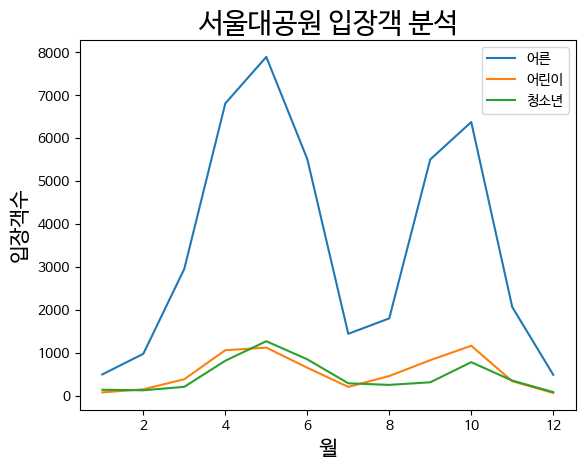

In [9]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.title("서울대공원 입장객 분석", fontsize=20)  # 그래프 제목
plt.plot(df_mon["어른"], label="어른")  # 월별 어른 이용객의 수
plt.plot(df_mon["어린이"], label="어린이")  # 월별 어린이 이용객의 수
plt.plot(df_mon["청소년"], label="청소년")  # 월별 청소년 이용객의 수
plt.xlabel("월", fontsize=15)
plt.ylabel("입장객수", fontsize=15)
plt.legend()
plt.show()

그래프의 가로축 눈금은 자동으로 2월 단위로 설정되었습니다. 

데이터는 월별로 총 12개밖에 없기 때문에 각 월별 데이터를 확실히 확인할 수 있도록 모든 월을 표시하고 격자를 추가하겠습니다.

**축의 눈금 조절하기**

x축의 눈금은 `xticks()`함수를 이용해 설정할 수 있습니다. (y축의 경우 `yticks()`)

`xticks()`에 원하는 축 눈금 위치를 전달해보겠습니다.

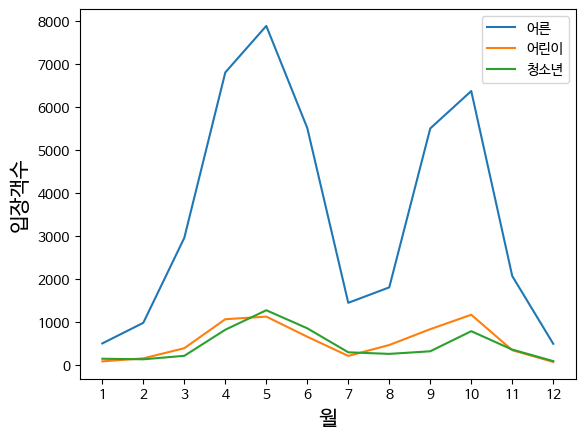

In [10]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.plot(df_mon["어른"], label="어른")
plt.plot(df_mon["어린이"], label="어린이")
plt.plot(df_mon["청소년"], label="청소년")
plt.xlabel("월", fontsize=15)
plt.ylabel("입장객수", fontsize=15)
plt.legend()
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달
plt.show()

**선 그래프의 모양 변경하기**

선 그래프의 모양을 변경하는 것은 좀 더 직관적인 시각화를 위해 필요한 작업입니다.

선 그래프의 모양에서 중요한 것은 아래 3가지가 있습니다.

1. 마커 (marker): 그래프의 데이터 포인트를 나타내는 작은 심볼입니다.
2. 선 모양 (linestyle): 선의 모양의 설정합니다.
3. 색 (color): 그래프의 색을 설정합니다.

각각의 요소들은 `plot()`함수에 매개변수를 전달하는 것으로 설정할 수 있습니다.

또한 각 매개변수는 선 그래프를 그리는 `plot()` 뿐 아니라 여러 함수에 사용할 수 있습니다.

**마커 (marker)**

먼저 마커의 모양을 변경해 보겠습니다.

마커의 모양은 `marker` 매개변수에 문자열을 전달하여 변경이 가능합니다.

코드를 통해 몇 가지 예시를 알아보겠습니다.

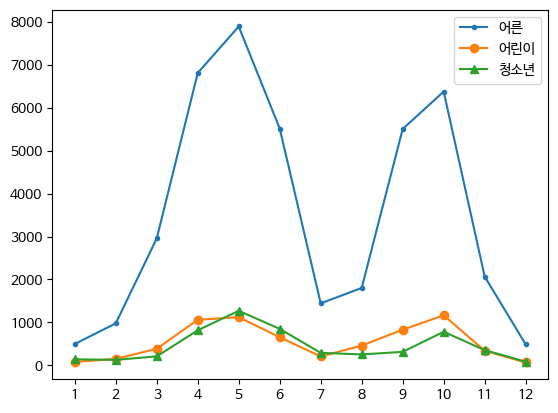

In [11]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.plot(df_mon["어른"], marker=".", label="어른") # 작은 원 모양의 마커
plt.plot(df_mon["어린이"],marker="o", label="어린이") # 큰 원 모양의 마커
plt.plot(df_mon["청소년"],marker="^", label="청소년") # 삼각형 모양의 마커
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달
plt.legend()
plt.show()

더 많은 종류의 마커는 [관련 공식 문서](https://matplotlib.org/stable/api/markers_api.html)를 참고해주세요 

**선 모양(linestyle)**

선의 모양을 설정하는 방법은 `linestyle`에 문자열을 전달하여 변경할 수 있습니다.

코드를 통해 몇 가지 예시를 알아보겠습니다.

모든 스타일의 종류는 [관련 문서](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle)를 참고해주세요

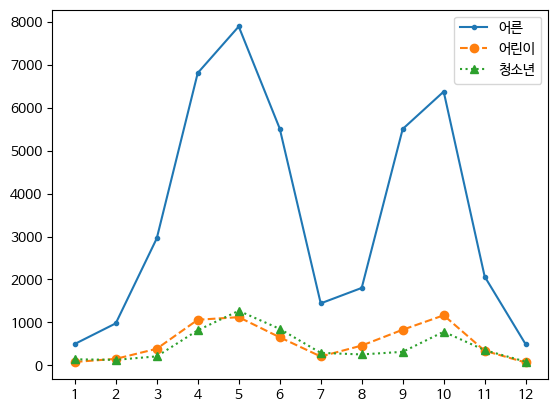

In [12]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.plot(df_mon["어른"], marker=".", label="어른", linestyle="-")  # 실선으로 그리기 (기본값)
plt.plot(df_mon["어린이"], marker="o", label="어린이", linestyle="--")  # 대시로 그리기
plt.plot(df_mon["청소년"], marker="^", label="청소년", linestyle=":")  # 점선으로 그리기
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달
plt.legend()
plt.show()

**색 (color)**

색은 따로 지정하지 않으면 각 그래프마다 다른 색으로 자동으로 설정됩니다.

그래프의 색은 마커와 선 모양과 비슷하게 `color` 매개변수를 전달하면 변경할 수 있습니다.

코드를 통해 몇 가지 예시를 알아보겠습니다.

색의 종류는 [관련 문서](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)를 참고해주세요

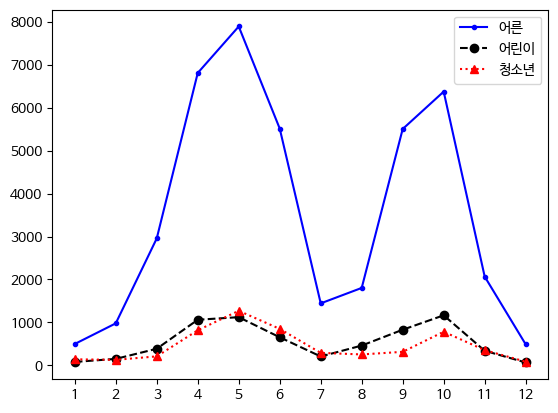

In [13]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.plot(df_mon["어른"], marker=".", label="어른", linestyle="-", color= "b")  # 파란색으로 그리기
plt.plot(df_mon["어린이"], marker="o", label="어린이", linestyle="--", color= "k")  # 검은색으로 그리기
plt.plot(df_mon["청소년"], marker="^", label="청소년", linestyle=":", color = "r")  # 빨간색으로 그리기
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달
plt.legend()
plt.show()

**격자 추가하기**

격자는 `grid()`라는 함수를 이용해 추가할 수 있습니다.

`plt.grid(True)` 를 호출하면 그래프의 격자가 나타나게 됩니다.

이 격자를 알아보기 위해 간단한 데이터를 정의하고 격자를 추가해보겠습니다.

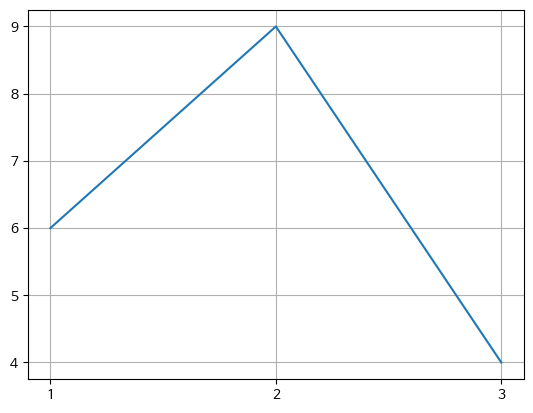

In [14]:
# 예시 데이터
x = [1, 2, 3]
y = [6, 9, 4]

plt.plot(x, y)  # 꺽은선 그래프
plt.xticks(x)  # 1, 2, 3에 눈금 표시

plt.grid(True)  # x축, y축 각각 격자가 생성됨

`plt.grid(True)`를 호출했더니 x축과 y축에 모두 격자가 추가되었습니다.

만약 특정 축에만 격자를 지정하려면 `axis` 매개변수를 전달하면 됩니다.

`axis` 매개변수는 `"both"`, `"x"`, `"y"` 중 선택할 수 있고 전달하지 않으면 `"both"`로 설정됩니다.

`x`축의 격자만 표시해보겠습니다.

이제 방금까지 배운 내용을 이용해 그래프를 다시 그려보겠습니다.

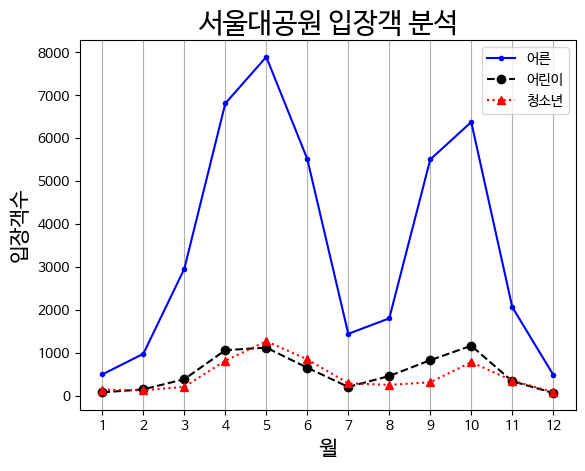

In [15]:
# 어른, 어린이, 청소년별 월별 입장객수 선그래프로 보기
plt.title("서울대공원 입장객 분석", fontsize=20)  # 그래프 제목
plt.plot(df_mon["어른"], marker=".", label="어른", linestyle="-", color= "b")  # 파란색으로 그리기
plt.plot(df_mon["어린이"], marker="o", label="어린이", linestyle="--", color= "k")  # 검은색으로 그리기
plt.plot(df_mon["청소년"], marker="^", label="청소년", linestyle=":", color = "r")  # 빨간색으로 그리기
plt.xlabel("월", fontsize=15)
plt.ylabel("입장객수", fontsize=15)
plt.legend()
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달

plt.grid(True, axis="x")  # x축 격자가 생성됨
plt.show()

### 2-2. Seaborn

seaborn을 사용해 그래프를 그리는 경우, `sns.lineplot()`함수를 통해 선 그래프를 그릴 수 있습니다.

`data` 매개변수에 시각화하려는 데이터 프레임을, x축과 y축에 들어갈 칼럼의 이름을 `x`, `y` 매개변수를 통해 전달하면 간단하게 그래프를 그릴 수 있습니다.

또한, 위에서 df_mon을 생성하는 과정없이, x축에 `"월"`, y축에 `"청소년"`과 같이 전달하면 자동으로 그래프가 생성됩니다.

`errorbar`의 경우 뒤의 막대 그래프에서 자세히 알아보겠습니다.

<Axes: xlabel='월', ylabel='어른'>

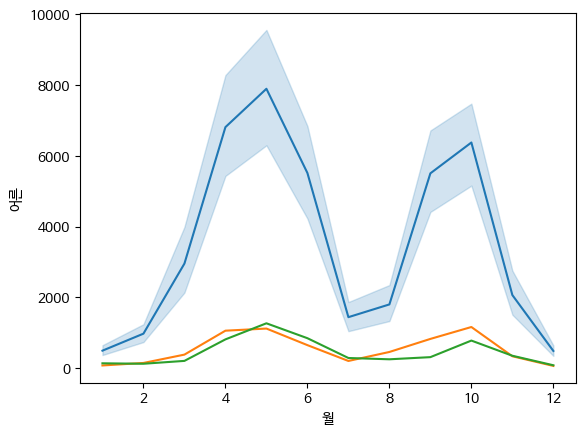

In [21]:
sns.lineplot(data=df, x="월", y="어른", errorbar='ci')
sns.lineplot(data=df, x="월", y="어린이", errorbar=None)
sns.lineplot(data=df, x="월", y="청소년", errorbar=None)

간단하게 선 그래프를 그렸습니다.

하지만 y축의 레이블이 컬럼의 이름을 따라가면서 `"어른"`이 되어 버렸습니다.

축의 레이블을 변경할 경우에는 앞에서와 같이 `plt.xlabel()`함수를 사용하면 됩니다.

그 외에 `plt.plot`에서 사용한 대부분의 매개변수도 사용할 수 있습니다.

위에서 알아본 내용을 추가해 그래프를 더 자세히 그려보겠습니다.

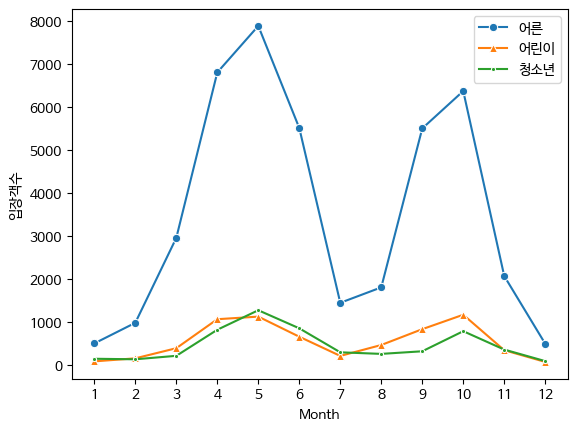

In [24]:
sns.lineplot(data=df, x="월", y="어른", label="어른", marker="o", errorbar=None)
sns.lineplot(data=df, x="월", y="어린이", label="어린이", marker="^", errorbar=None)
sns.lineplot(data=df, x="월", y="청소년", label="청소년", marker=".", errorbar=None)
plt.ylabel("입장객수")
plt.xlabel("Month")
plt.xticks([mon for mon in range(1, 13)])  # 1부터 12가 들어있는 리스트를 xticks에 전달
plt.show()

이렇게 seaborn의 함수를 사용하면 `data` 매개변수에 시각화할 데이터를 넘기고, `x`, `y`축의 칼럼 이름만 지정하면 간단하게 그래프를 그릴 수 있습니다.

하지만, 그래프의 모양을 조절할 경우 여전히 matplotlib의 함수들을 호출해 모양을 변경해야 합니다.

## 3. 막대그래프

막대그래프는 데이터를 시각적으로 표현하는 데 사용되는 그래프 중 하나입니다. 각 막대는 항목을 나타내는 축과 수치값을 나타내는 축으로 구성됩니다.

막대그래프는 데이터를 직관적으로 이해하기 쉽게 해주는 장점이 있습니다. 막대의 길이를 비교함으로써 각 항목 간의 상대적인 크기 차이를 쉽게 파악할 수 있습니다.

### 3-1. Matplotlib

요일별 데이터를 시각화하기 위해서 먼저 `groupby()`를 통해 요일별 평균을 구하겠습니다.

In [28]:
df_week = df.groupby("요일").mean(numeric_only=True)
df_week = df_week.reset_index()  # "요일" 열을 다시 데이터프레임의 열로 가져옴
df_week

,요일,Unnamed: 0,어른,청소년,어린이,외국인,단체,총입장객수,연,월,일,매출액
0,금,541.153846,1964.185897,938.371795,359.980769,56.480769,1734.288462,5047.487179,2017.173077,6.448718,15.423077,3.274654e+07
1,목,543.645161,1770.696774,575.735484,343.225806,54.354839,1236.606452,4538.670968,2017.180645,6.438710,15.883871,2.693465e+07
2,수,542.645161,1885.664516,329.941935,449.329032,53.954839,800.090323,4229.051613,2017.180645,6.400000,16.058065,2.671729e+07
3,월,541.876623,2231.545455,361.155844,335.694805,55.435065,636.603896,4369.272727,2017.175325,6.448052,15.564935,2.925058e+07
4,일,544.387097,7669.587097,275.470968,1018.664516,144.541935,285.722581,12017.535484,2017.180645,6.470968,15.658065,8.974174e+07
5,토,542.153846,7631.698718,211.955128,1010.307692,110.051282,456.608974,12243.506410,2017.173077,6.480769,15.448718,8.878192e+07
6,화,541.645161,1801.683871,546.535484,331.496774,52.748387,1095.632258,4316.541935,2017.180645,6.380645,15.658065,2.722406e+07


matplotlib에서 막대그래프는 `bar()`함수를 이용해 만들 수 있습니다.

Text(0, 0.5, '청소년 입장객수')

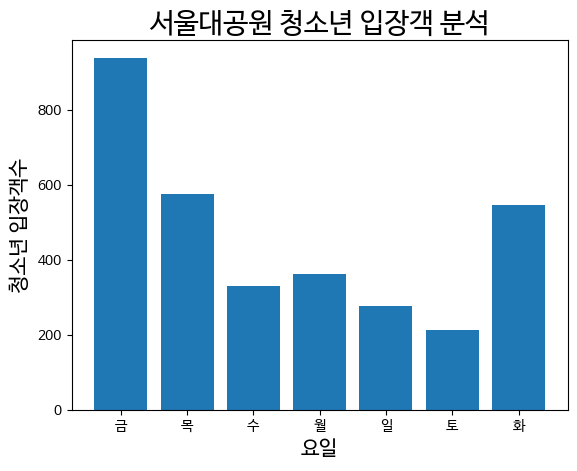

In [29]:
plt.title("서울대공원 청소년 입장객 분석", fontsize=20)  # 그래프의 제목
plt.bar(df_week["요일"], df_week["청소년"])  # 가로에는 요일을, 세로에는 청소년 입장객의 수를 표시합니다.
plt.xlabel("요일", fontsize=15)
plt.ylabel("청소년 입장객수", fontsize=15)

위 막대그래프는 요일별 청소년 입장객의 수를 쉽게 비교할 수 있도록 도와줍니다.

데이터에 따라서 가로 막대그래프를 그려야 하는 경우도 있습니다.

가로 막대그래프는 `barh()`함수를 이용해 다음과 같이 그릴 수 있습니다.

Text(0, 0.5, '요일')

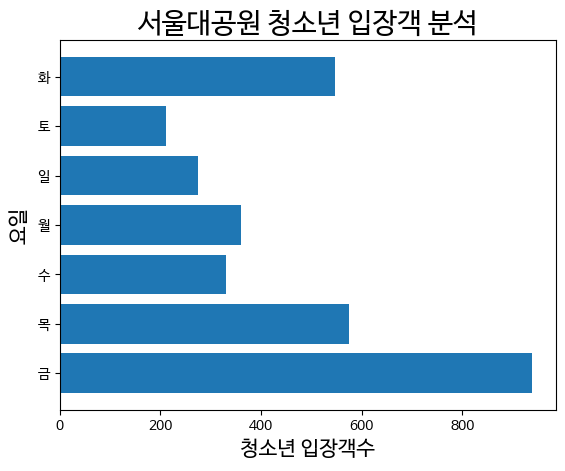

In [30]:
plt.title("서울대공원 청소년 입장객 분석", fontsize=20)
plt.barh(df_week["요일"], df_week["청소년"])  # 가로 막대그래프. 
plt.xlabel("청소년 입장객수", fontsize=15) # 가로가 입장객의 수가 되었으니 가로축의 레이블을 바꿔줍니다.
plt.ylabel("요일", fontsize=15) # 이제 세로축은 요일이 되었습니다.

이 그래프를 확인하면 토요일에 가장 적은 청소년 관광객이 입장하는 것을 한눈에 알 수 있습니다.

지금의 그래프는 정렬이 되어 있지 않아서 순위를 한눈에 보여주지 않습니다.

관광객의 수가 많은 순서대로 정렬한다면 요일별 관광객의 순위를 한눈에 파악할 수 있습니다.

데이터 프레임을 정렬할 때는 `sort_values()` 함수를 사용합니다.

이 `sort_values()`함수에 `by`와 `ascending` 매개변수를 이용하면 정렬을 구현할 수 있습니다.

이렇게 정렬된 새로운 데이터 프레임은 `df_sorted`이라는 변수에 넣겠습니다.

Text(0, 0.5, '청소년 입장객수')

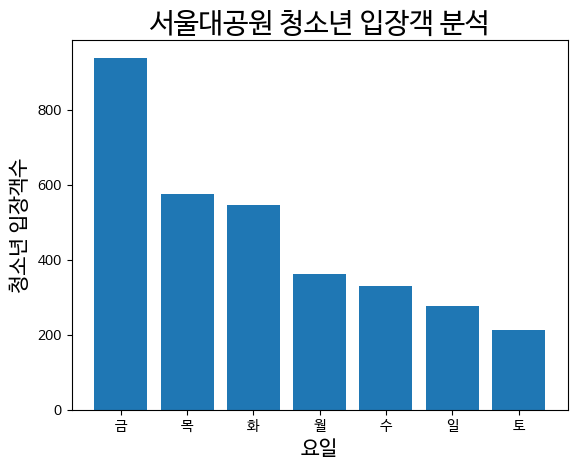

In [31]:
# 데이터프레임을 입장객 수로 내림차순 정렬합니다.
df_sorted = df_week.sort_values(by="청소년", ascending=False)
# by: 어떤 칼럼으로 정렬할지 선택합니다. ascending: True라면 오름차순, False라면 내림차순입니다.

plt.title("서울대공원 청소년 입장객 분석", fontsize=20)
plt.bar(df_sorted["요일"], df_sorted["청소년"])  # 세로 막대그래프
plt.xlabel("요일", fontsize=15)
plt.ylabel("청소년 입장객수", fontsize=15)

이제 가장 입장객이 많은 요일부터 순서대로 그래프가 그려졌습니다.

이렇게 막대그래프를 정렬하면 가장 큰 값이나 가장 작은 값 외에도 큰 순서에 대한 정보도 쉽게 시각화할 수 있습니다.

### 3-2. Seaborn

seaborn에서 막대그래프를 그리려면 `sns.barplot()`함수를 사용하면 간단하게 그래프를 그릴 수 있습니다.

seaborn의 그래프를 그리는 함수들에 `data`라는 매개변수로 데이터 프레임을 전달하면, x, y에 각각 칼럼의 이름을 전달하면 그래프를 그려줍니다.

이렇게 칼럼의 이름을 전달할 경우, 자동으로 x축과 y축의 레이블까지 설정되어, 따로 전달할 필요가 없습니다.

<Axes: xlabel='요일', ylabel='청소년'>

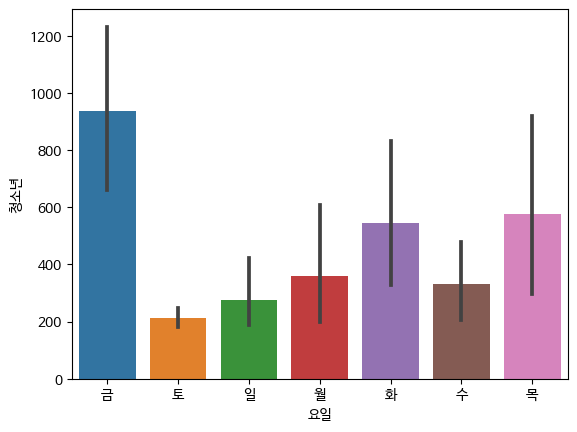

In [32]:
sns.barplot(data=df, x="요일", y="청소년")  # data에 df를 전달하고 x, y축에 해당하는 칼럼의 이름을 전달

그래프에 보이는 검은색 막대는 신뢰구간을 표현하는 오차막대입니다.

기본적으로 95%의 신뢰구간을 표현합니다.

간단하게 말하면 100개의 데이터를 뽑으면 95개는 저 검은색 범위에 들어간다는 의미입니다.

이 그래프의 신뢰도를 보여주는 중요한 수치이지만, 경우에 따라 제거할 수도 있습니다.

저 막대를 표시하고 싶지 않다면, `barplot()`함수에 `errorbar=None`을 전달하면 됩니다.

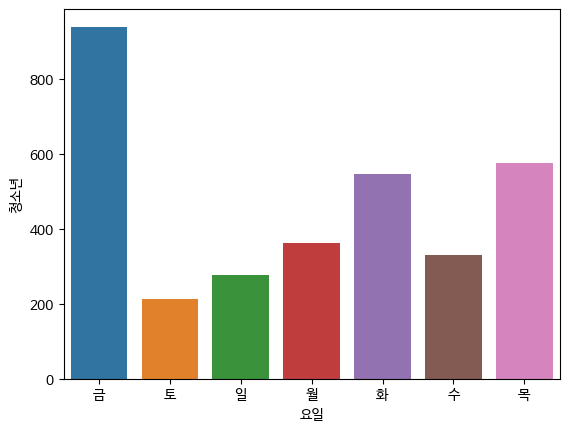

In [33]:
sns.barplot(data=df, x="요일", y="청소년", errorbar=None) # errorbar=None을 전달하여 오차 막대를 제거함
plt.show()

이렇게 seaborn을 이용해 그래프를 그리는 경우 각 막대의 색을 다르게 설정해주어 시각적으로 더 깔끔하게 볼 수 있습니다.

또한, 그룹 막대 그래프를 그릴 때 더 편하게 코드를 작성할 수 있습니다.

다음은 날씨별 어린이 입장객의 수를 막대 그래프로 그리는 코드입니다.

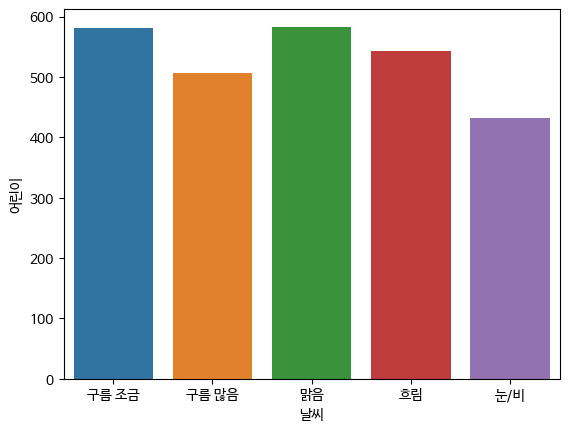

In [34]:
sns.barplot(data=df, x="날씨", y="어린이", errorbar=None) # 날씨별로 어린이 입장객의 수를 표현
plt.show()

이 그래프에 공휴일 여부를 그룹으로 표시해보겠습니다.

그룹을 만들 기준이 되는 `"공휴일"`이라는 칼럼 이름을 `hue` 매개변수에 전달하면 됩니다.

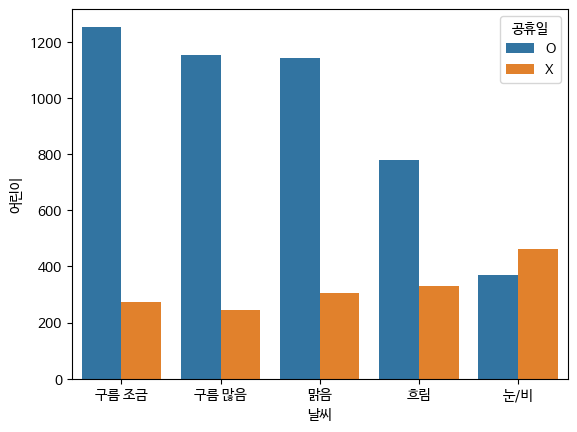

In [35]:
sns.barplot(data=df, x="날씨", y="어린이", errorbar=None, hue="공휴일") # "공휴일" 값을 기준으로 그룹을 나눔
plt.show()

이렇게 seaborn의 `hue`를 이용하면 더 세분화된 막대 그래프를 편하게 그릴 수 있습니다.

## 4. [TODO] 연도별 매출액 그래프 그리기

위에서 배운 `sns.lineplot`과 `sns.barplot`을 이용해 연도별 공휴일 여부에 따른 매출액 그래프를 그려보세요.

다음 조건을 모두 만족하도록 그래프를 그려보세요.

- `plt.subplots`을 이용해 1행 2열로 구성된 서브플롯을 생성하여 `ax1`, `ax2`에 저장합니다.
- `ax1`에는 x축을 `"연"`, y축을 `"매출액"`으로 하는 선 그래프를 그립니다. (`sns.lineplot` 사용)
    - `errorbar=None`을 전달합니다.
    - 마커는 `"o"`로 지정합니다.
    - 색은 `"r"`로 지정합니다.
    - `ax1`의 제목은 `"연도별 매출액"`으로 설정합니다.
- `ax2`에는 x축을 `"연"`, y축을 `"매출액"`으로 하는 막대 그래프를 그립니다. (`sns.barplot` 사용)
    - `errorbar=None`을 전달합니다.
    - `hue`값을 이용하여 `"공휴일"`을 기준으로 그룹을 나눠 그립니다.
    - `ax2`의 제목은 `"공휴일 여부에 따른 매출액"`으로 설정합니다.

아래는 위 조건들을 만족하는 그래프를 그리기 위한 코드입니다.

위에서 배운 내용을 활용하여 `None`을 지우고 코드를 작성하세요.

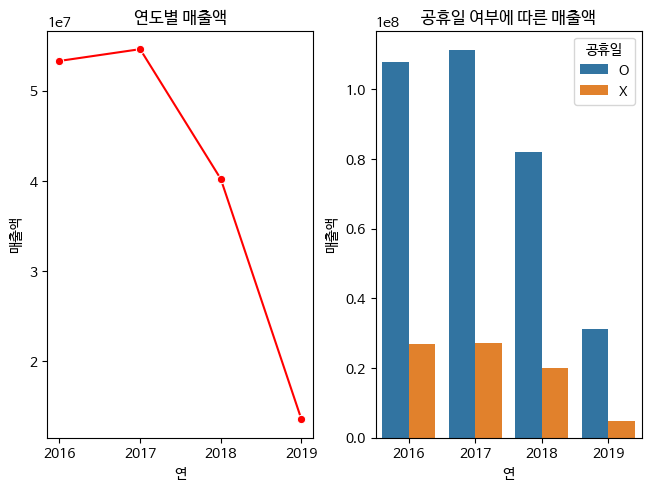

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)  # 1행 2열로 구성된 서브플롯 생성합니다.

sns.lineplot(
    data=df, x="연", y="매출액", errorbar=None, marker="o", ax=ax1, color="r"
)  # ax1에 선 그래프를 그립니다. errorbar=None은 그대로 두셔도 됩니다.
ax1.set_title("연도별 매출액")  # ax1의 제목을 설정합니다.

sns.barplot(
    data=df, x=df["연"], y=df["매출액"], hue="공휴일", errorbar=None, ax=ax2
)  # ax2에 막대 그래프를 그립니다.
# "공휴일" 값을 기준으로 그룹을 나눕니다.
#df.groupby("공휴일")
ax2.set_title("공휴일 여부에 따른 매출액")  # ax2의 제목을 설정합니다.

plt.show()

위조건을 만족하는 그래프를 그리면 아래와 같은 그래프가 나타납니다.

![](https://cdn-api.elice.io/api-attachment/attachment/fdcdbc70962e4bb58edd4dddbe91ceb4/output.png)

**위에서 문제를 해결하셨다면 아래 코드를 실행하시고 제출을 눌러보세요!**

In [38]:
# 아래 코드는 제출을 위한 코드로 수정하시면 정상적인 평가가 어려울 수 있습니다.
from submit import submit
try:
    submit(ax1, ax2)
except:
    print("아직 코드가 정상적으로 실행되지 않았습니다. 위 코드를 완성해보세요.")